# Capstone Project - The Battle of Neighbourhoods

### The scope of the project to use Foursquare API and Machine Learing algorithm to analyse the city of London with respect to establishing a business from small and medium scale enterpruer and also to guide tourist visiting United Kingdom

In [1]:
# Import required libraries 
import pandas as pd # library to handle data analysis
import numpy as np # library to handle data in a vectorised manner
from geopy.geocoders import Nominatim # convert a address into latitude and longitude values

# Matplotlib for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

### Using BeautifulSoup library to get the London neighborhoods

In [2]:
from bs4 import BeautifulSoup
import requests
import re
url = "https://www.google.com/search?rlz=1C1GCEA_enFI857FI857&sxsrf=ALeKk03DvmhevzZrsKlfFaBin86g2ibjfw%3A1603469301636&ei=9f-SX8WsJoSDhbIP_ICD4AM&q=london+neighborhoods&oq=london+nei&gs_lcp=CgZwc3ktYWIQAxgAMgcIABDJAxBDMgUIABCRAjIECAAQQzICCAAyBAgAEEMyAggAMgIIADICCAAyAggAMgIIADoECAAQRzoECCMQJzoKCC4QxwEQrwEQJzoECC4QQzoKCC4QxwEQrwEQQzoICAAQsQMQgwE6CAguEMcBEKMCOgcIIxDqAhAnOggILhDJAxCRAjoCCC46CAguEMcBEK8BOggILhCxAxCRAjoKCC4QxwEQowIQQzoFCAAQsQM6CwguELEDEMcBEK8BUNksWKxeYMFtaAFwAngAgAGsAYgB5wySAQQxLjEwmAEAoAEBqgEHZ3dzLXdperABCsgBCMABAQ&sclient=psy-ab"
response = requests.get(url)
london_raw_data = BeautifulSoup(response.text, 'lxml')
contents = london_raw_data.find_all('div', class_='RWuggc kCrYT')
columns = ['Neighborhood']
london_neighborhood = pd.DataFrame(columns = columns)
for content in contents:
    #coordinate = content.find('div', class_='BNeawe s3v9rd AP7Wnd')
    neighbor_ = content.find('div').find('div').text
    london_neighborhood = london_neighborhood.append({'Neighborhood': neighbor_}, ignore_index=True)
london_neighborhood

Neighborhood
0               Chelsea
1           Camden Town
2                  Soho
3         Covent Garden
4          Canary Wharf
5           Westminster
6            Shoreditch
7         Knightsbridge
8         Little Venice
9               Mayfair
10         Notting Hill
11        Primrose Hill
12              Brixton
13            The Angel
14              Peckham
15                  Lee
16        Finsbury Park
17            Wimbledon
18          Hammersmith
19          Kings Cross
20          Clerkenwell
21               Ealing
22            Hampstead
23             Chiswick
24  Elephant and Castle
25            Streatham
26           Marylebone
27            Belgravia
28             Lewisham
29      Shepherd's Bush
30             Woolwich
31         Muswell Hill
32      Stoke Newington
33         Clapham Town
34        Bethnal Green
35           Bermondsey
36               Putney
37              Tooting
38           Camberwell
39           Maida Vale
40               Balham
41           Blackheath
42              Dulwich
43         Earl's Court
44            Chingford
45           South Bank
46              Pimlico
47           Kennington
48           Crouch End
49             Highgate
50     South Kensington
51           Manchester
52            Cambridge
53            Edinburgh
54              Cardiff

Use geolocator to get the data for each neighborhood

In [3]:
london_coor = pd.DataFrame(columns = ['Latitude','Longitude'])
geolocator = Nominatim(user_agent="london")
for row in london_neighborhood['Neighborhood']:
    location = geolocator.geocode(row)
    london_coor = london_coor.append({'Latitude':location.latitude, 'Longitude':location.longitude}, ignore_index=True)
london_neighborhood = london_neighborhood.join(london_coor)
london_neighborhood

Neighborhood   Latitude  Longitude
0               Chelsea  51.487542  -0.168220
1           Camden Town  51.542305  -0.139560
2                  Soho  51.513163  -0.131175
3         Covent Garden  51.512874  -0.122544
4          Canary Wharf  51.504895  -0.019001
5           Westminster  51.500444  -0.126540
6            Shoreditch  51.526669  -0.079893
7         Knightsbridge  51.500844  -0.166965
8         Little Venice  42.690591 -84.955827
9               Mayfair  51.511087  -0.147058
10         Notting Hill  51.510999  -0.205527
11        Primrose Hill  51.539017  -0.161938
12              Brixton  51.456804  -0.116796
13            The Angel  51.531842  -0.105714
14              Peckham  51.473412  -0.069932
15                  Lee  30.303135 -96.958859
16        Finsbury Park  51.564835  -0.106414
17            Wimbledon  51.421479  -0.206403
18          Hammersmith  51.492038  -0.223640
19          Kings Cross  51.532395  -0.123022
20          Clerkenwell  51.523727  -0.105555
21               Ealing  51.512655  -0.305195
22            Hampstead  51.558084  -0.173721
23             Chiswick  51.492314  -0.263818
24  Elephant and Castle  51.494888  -0.100573
25            Streatham  51.429769  -0.131110
26           Marylebone  51.522059  -0.150455
27            Belgravia  51.498213  -0.153500
28             Lewisham  51.462432  -0.010133
29      Shepherd's Bush  51.505314  -0.222901
30             Woolwich  51.482670   0.062334
31         Muswell Hill  51.591040  -0.142077
32      Stoke Newington  51.557697  -0.077282
33         Clapham Town  51.467542  -0.150380
34        Bethnal Green  51.530346  -0.056163
35           Bermondsey  51.497012  -0.063268
36               Putney  51.462552  -0.216746
37              Tooting  51.426659  -0.169077
38           Camberwell  51.474571  -0.092542
39           Maida Vale  51.527592  -0.190592
40               Balham  49.491626   4.161197
41           Blackheath  51.466318   0.008562
42              Dulwich  51.441879  -0.084324
43         Earl's Court  51.491612  -0.193903
44            Chingford  51.630887   0.003996
45           South Bank  51.508035  -0.109681
46              Pimlico  51.488999  -0.139882
47           Kennington  51.488286  -0.105883
48           Crouch End  51.578740  -0.123599
49             Highgate  51.574432  -0.152684
50     South Kensington  51.494049  -0.173044
51           Manchester  53.479489  -2.245115
52            Cambridge  52.203482   0.123582
53            Edinburgh  55.953346  -3.188375
54              Cardiff  51.481655  -3.179193

# Draw a map of London

In [4]:
address = 'london'

geolocator = Nominatim(user_agent="london")
location = geolocator.geocode(address)
latitude_london = location.latitude
longitude_london = location.longitude
map_london = folium.Map(location=[latitude_london, longitude_london], zoom_start=14)

# add markers to map
for lat, lng, postal in zip(london_neighborhood['Latitude'],london_neighborhood['Longitude'],london_neighborhood['Neighborhood']):
    label = str(postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# Get the venues using Fourspare

In [5]:
CLIENT_ID = 'PK4BH4MYKQKYUVXDUY403J3KMCAGSQ2TSPQJKDCECO5VLTIC'
CLIENT_SECRET = 'KDAHVE0IMPH0XDGSV2JEXW41QI1E3MD2LGJPCWZ4OHU0EZUH'
VERSION = '20201020' # Foursquare API version
radius=1000
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
london_venues = getNearbyVenues(names=london_neighborhood['Neighborhood'],
                                   latitudes=london_neighborhood['Latitude'],
                                   longitudes=london_neighborhood['Longitude']
                                  )


[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba4eb0ff964a520e9c238e3', 'name': 'Anthropologie', 'location': {'address': '131-141 Kings Rd', 'lat': 51.48801219256875, 'lng': -0.1666530953311291, 'labeledLatLngs': [{'label': 'display', 'lat': 51.48801219256875, 'lng': -0.1666530953311291}], 'distance': 120, 'postalCode': 'SW3 4PW', 'cc': 'GB', 'city': 'Kensington', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['131-141 Kings Rd', 'Kensington', 'Greater London', 'SW3 4PW', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d108951735', 'name': "Women's Store", 'pluralName': "Women's Stores", 'shortName': "Women's Store", 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_women_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ba4eb0ff964a520e9c238e3-0'}, {'reasons': {'count':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b941c2ff964a520c26834e3', 'name': "Regent's Canal", 'location': {'address': 'Camley Street Bridge', 'lat': 51.541130539543104, 'lng': -0.13963580131530762, 'labeledLatLngs': [{'label': 'display', 'lat': 51.541130539543104, 'lng': -0.13963580131530762}], 'distance': 130, 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Camley Street Bridge', 'London', 'Greater London', 'United Kingdom']}, 'categories': [{'id': '56aa371be4b08b9a8d573562', 'name': 'Canal', 'pluralName': 'Canals', 'shortName': 'Canal', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/river_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b941c2ff964a520c26834e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'typ

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ac518edf964a520c8ac20e3', 'name': 'Foyles', 'location': {'address': '107 Charing Cross Rd', 'lat': 51.514158, 'lng': -0.129729, 'labeledLatLngs': [{'label': 'display', 'lat': 51.514158, 'lng': -0.129729}], 'distance': 149, 'postalCode': 'WC2H 0DT', 'cc': 'GB', 'neighborhood': 'Soho, London, Greater London', 'city': 'Soho', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['107 Charing Cross Rd', 'Soho', 'Greater London', 'WC2H 0DT', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d114951735', 'name': 'Bookstore', 'pluralName': 'Bookstores', 'shortName': 'Bookstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ac518edf964a520c8ac20e3-0'}, {'reasons': {'count': 0, 'items': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba6419bf964a520b23f39e3', 'name': 'Covent Garden Market', 'location': {'address': 'The Piazza', 'lat': 51.51197662809401, 'lng': -0.12279871749342419, 'labeledLatLngs': [{'label': 'display', 'lat': 51.51197662809401, 'lng': -0.12279871749342419}], 'distance': 101, 'postalCode': 'WC2E 8RF', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['The Piazza', 'London', 'Greater London', 'WC2E 8RF', 'United Kingdom']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'Shopping Plaza', 'pluralName': 'Shopping Plazas', 'shortName': 'Shopping Plaza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ba6419bf964a520b23f39e3-0'}, {'reasons': {'count': 0, 'items': [{

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '55436286498e62aebb77fb26', 'name': 'Crossrail Place Roof Garden', 'location': {'address': 'Crossrail Place', 'crossStreet': 'N Colonnade', 'lat': 51.50596468276459, 'lng': -0.016822266761862707, 'labeledLatLngs': [{'label': 'display', 'lat': 51.50596468276459, 'lng': -0.016822266761862707}], 'distance': 192, 'postalCode': 'E14 5AB', 'cc': 'GB', 'city': 'Canary Wharf', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Crossrail Place (N Colonnade)', 'Canary Wharf', 'Greater London', 'E14 5AB', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d15a941735', 'name': 'Garden', 'pluralName': 'Gardens', 'shortName': 'Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/garden_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-554362

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ac518cef964a520f6a520e3', 'name': 'Elizabeth Tower (Big Ben) (Big Ben (Elizabeth Tower))', 'location': {'address': 'Parliament Sq', 'crossStreet': 'Bridge St', 'lat': 51.50062, 'lng': -0.124578, 'labeledLatLngs': [{'label': 'display', 'lat': 51.50062, 'lng': -0.124578}], 'distance': 137, 'postalCode': 'SW1A 0AA', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Parliament Sq (Bridge St)', 'London', 'Greater London', 'SW1A 0AA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d12d941735', 'name': 'Monument / Landmark', 'pluralName': 'Monuments / Landmarks', 'shortName': 'Landmark', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_monument_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '549

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d000afb21ea6ea817ce3f9f', 'name': 'Happiness Forgets', 'location': {'address': '8-9 Hoxton Sq', 'crossStreet': 'Basement', 'lat': 51.527746, 'lng': -0.081591, 'labeledLatLngs': [{'label': 'display', 'lat': 51.527746, 'lng': -0.081591}], 'distance': 167, 'postalCode': 'N1 6NU', 'cc': 'GB', 'city': 'Hackney', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['8-9 Hoxton Sq (Basement)', 'Hackney', 'Greater London', 'N1 6NU', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d11e941735', 'name': 'Cocktail Bar', 'pluralName': 'Cocktail Bars', 'shortName': 'Cocktail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '38184688'}}, 'referralId': 'e-0-4d000afb21ea6ea817ce3f9f-0'}, {'r

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5641abb038fa7b01648ae33e', 'name': 'Carpo', 'location': {'address': '5 Montpelier St', 'lat': 51.49894917422254, 'lng': -0.1654982068808371, 'labeledLatLngs': [{'label': 'display', 'lat': 51.49894917422254, 'lng': -0.1654982068808371}], 'distance': 234, 'postalCode': 'SW7 1EX', 'cc': 'GB', 'neighborhood': 'Knightsbridge', 'city': 'Knightsbridge', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['5 Montpelier St', 'Knightsbridge', 'Greater London', 'SW7 1EX', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5641abb038fa7b01648ae33e-0'}, {'reasons': {'count': 0, 'ite

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5028d6e5e88907e1c5a3717b', 'name': 'Phillips', 'location': {'address': '30 Berkeley Sq', 'lat': 51.51038095586057, 'lng': -0.14701724980743197, 'labeledLatLngs': [{'label': 'display', 'lat': 51.51038095586057, 'lng': -0.14701724980743197}], 'distance': 78, 'postalCode': 'W1J 6EX', 'cc': 'GB', 'neighborhood': 'Mayfair', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['30 Berkeley Sq', 'London', 'Greater London', 'W1J 6EX', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e2931735', 'name': 'Art Gallery', 'pluralName': 'Art Galleries', 'shortName': 'Art Gallery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '46598959'}}, 'referralId': 'e-0

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5980bc24e65d0c3d5d28e3b2', 'name': 'Core By Clare Smyth', 'location': {'address': '92 Kensington Park Rd', 'lat': 51.512651265916645, 'lng': -0.20311585807061372, 'labeledLatLngs': [{'label': 'display', 'lat': 51.512651265916645, 'lng': -0.20311585807061372}], 'distance': 248, 'postalCode': 'W11 2PN', 'cc': 'GB', 'neighborhood': 'Pembridge', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['92 Kensington Park Rd', 'Notting Hill', 'Greater London', 'W11 2PN', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1c4941735', 'name': 'Restaurant', 'pluralName': 'Restaurants', 'shortName': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5980bc24e65d0c3d5d28

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b2e246ef964a520f9dc24e3', 'name': 'Primrose Hill', 'location': {'address': 'Primrose Hill Rd', 'lat': 51.539262109281196, 'lng': -0.1619410514831543, 'labeledLatLngs': [{'label': 'display', 'lat': 51.539262109281196, 'lng': -0.1619410514831543}], 'distance': 27, 'postalCode': 'NW3 3DS', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Primrose Hill Rd', 'London', 'Greater London', 'NW3 3DS', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b2e246ef964a520f9dc24e3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This sp

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56af12d1498e88c71a2dc0a9', 'name': 'Stir Coffee', 'location': {'address': '111 Brixton Hill', 'crossStreet': 'Arodene Rd', 'lat': 51.454465, 'lng': -0.119599, 'labeledLatLngs': [{'label': 'display', 'lat': 51.454465, 'lng': -0.119599}], 'distance': 324, 'postalCode': 'SW2 1AA', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['111 Brixton Hill (Arodene Rd)', 'London', 'Greater London', 'SW2 1AA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '357263313'}}, 'referralId': 'e-0-56af12d1498e88c71a2dc0a9-0'}, {

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50da842cc84c4c57279457da', 'name': 'Present & Correct', 'location': {'address': '23 Arlington Way', 'lat': 51.53014701529403, 'lng': -0.1062308090426986, 'labeledLatLngs': [{'label': 'display', 'lat': 51.53014701529403, 'lng': -0.1062308090426986}], 'distance': 192, 'postalCode': 'EC1R 1UY', 'cc': 'GB', 'city': 'Greater London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['23 Arlington Way', 'Greater London', 'EC1R 1UY', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d121951735', 'name': 'Paper / Office Supplies Store', 'pluralName': 'Paper / Office Supplies Stores', 'shortName': 'Office Supplies', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/papergoods_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50da842cc84c4c57279457da

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bc84e24af07a5930792802d', 'name': 'Persepolis', 'location': {'address': 'Peckham High St.', 'lat': 51.47345210865369, 'lng': -0.07168163023405306, 'labeledLatLngs': [{'label': 'display', 'lat': 51.47345210865369, 'lng': -0.07168163023405306}], 'distance': 121, 'postalCode': 'SE15 5DT', 'cc': 'GB', 'city': 'Peckham', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Peckham High St.', 'Peckham', 'Greater London', 'SE15 5DT', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bc84e24af07a5930792802d-0'}, {'reasons': {'count': 0, 'i

[]
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5579ea6b498e3a9a06192222', 'name': 'Pure Cyprus', 'location': {'address': '14 Goodwin St', 'lat': 51.564226007784185, 'lng': -0.10803937911987305, 'labeledLatLngs': [{'label': 'display', 'lat': 51.564226007784185, 'lng': -0.10803937911987305}], 'distance': 131, 'postalCode': 'N4 3HQ', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['14 Goodwin St', 'London', 'Greater London', 'N4 3HQ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d10e941735', 'name': 'Greek Restaurant', 'pluralName': 'Greek Restaurants', 'shortName': 'Greek', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/greek_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '148004529'}}, 'referralId': 'e-0-5579ea6b498e3a9a06192222-0'}, {'reasons

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d60286e29ef236a90d5a159', 'name': 'Curzon Wimbledon', 'location': {'address': 'Second Floor, 23 The Broadway', 'crossStreet': '2nd Fl.', 'lat': 51.42034640776266, 'lng': -0.20523083236184902, 'labeledLatLngs': [{'label': 'display', 'lat': 51.42034640776266, 'lng': -0.20523083236184902}], 'distance': 150, 'postalCode': 'SW19 1RE', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Second Floor, 23 The Broadway (2nd Fl.)', 'London', 'Greater London', 'SW19 1RE', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d17f941735', 'name': 'Movie Theater', 'pluralName': 'Movie Theaters', 'shortName': 'Movie Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bd48d456f6495217c956dec', 'name': 'Lyric Hammersmith', 'location': {'address': 'Lyric Sq', 'crossStreet': 'King St', 'lat': 51.49307750861718, 'lng': -0.22613891719621268, 'labeledLatLngs': [{'label': 'display', 'lat': 51.49307750861718, 'lng': -0.22613891719621268}], 'distance': 208, 'postalCode': 'W6 0QL', 'cc': 'GB', 'city': 'Hammersmith', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Lyric Sq (King St)', 'Hammersmith', 'Greater London', 'W6 0QL', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d137941735', 'name': 'Theater', 'pluralName': 'Theaters', 'shortName': 'Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '33638512'}}, 'referr

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '557ec29e498ec3aba3829a45', 'name': 'Granger & Co.', 'location': {'address': '7 Pancras Sq', 'crossStreet': 'Stanley Building', 'lat': 51.53260599028002, 'lng': -0.12527477492529587, 'labeledLatLngs': [{'label': 'display', 'lat': 51.53260599028002, 'lng': -0.12527477492529587}], 'distance': 157, 'postalCode': 'N1C 4AG', 'cc': 'GB', 'neighborhood': 'Kings Cross', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['7 Pancras Sq (Stanley Building)', 'London', 'Greater London', 'N1C 4AG', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'refer

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5075f6e483025e379ad10f69', 'name': 'The Zetter Townhouse', 'location': {'address': "49-50 St John's Sq", 'lat': 51.52284911748324, 'lng': -0.10365836450009992, 'labeledLatLngs': [{'label': 'display', 'lat': 51.52284911748324, 'lng': -0.10365836450009992}], 'distance': 163, 'postalCode': 'EC1V 4JJ', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ["49-50 St John's Sq", 'London', 'Greater London', 'EC1V 4JJ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5075f6e483025e379ad10f69-0'}, {'reasons': {'count': 0, 'items': [{'summary'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5403335b498e46786b2ff5ef', 'name': 'Artisan Coffee', 'location': {'address': '32 New Broadway', 'lat': 51.513023912109674, 'lng': -0.3066550602357168, 'labeledLatLngs': [{'label': 'display', 'lat': 51.513023912109674, 'lng': -0.3066550602357168}], 'distance': 109, 'postalCode': 'W5 2XA', 'cc': 'GB', 'city': 'Ealing', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['32 New Broadway', 'Ealing', 'Greater London', 'W5 2XA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5403335b498e46786b2ff5ef-0'}, {'reasons': {'count': 0, 'items': [{'sum

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ac61631f964a520cab220e3', 'name': 'The Wells', 'location': {'address': '30 Well Walk', 'crossStreet': 'Christchurch Hill', 'lat': 51.55862188598442, 'lng': -0.1738013059083379, 'labeledLatLngs': [{'label': 'display', 'lat': 51.55862188598442, 'lng': -0.1738013059083379}], 'distance': 60, 'postalCode': 'NW3 1BX', 'cc': 'GB', 'neighborhood': 'Hampstead Town', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['30 Well Walk (Christchurch Hill)', 'London', 'Greater London', 'NW3 1BX', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57c97c49498e4a514b1ac09c', 'name': 'The Italians', 'location': {'address': '454 Chiswick High Road', 'lat': 51.492838248957206, 'lng': -0.2677542751186725, 'labeledLatLngs': [{'label': 'display', 'lat': 51.492838248957206, 'lng': -0.2677542751186725}], 'distance': 278, 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['454 Chiswick High Road', 'London', 'Greater London', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57c97c49498e4a514b1ac09c-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5bdb47200d2be7002c179bb7', 'name': "Theo's Pizzeria", 'location': {'address': 'Draper House, 17-19 Elephant and Castle', 'lat': 51.492847, 'lng': -0.100349486, 'labeledLatLngs': [{'label': 'display', 'lat': 51.492847, 'lng': -0.100349486}], 'distance': 227, 'postalCode': 'SE1 6TH', 'cc': 'GB', 'neighborhood': 'Elephant and Castle', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Draper House, 17-19 Elephant and Castle', 'London', 'Greater London', 'SE1 6TH', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5bdb47200d2be7002c179bb

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50ef3d24e4b00f0bd1d6fd81', 'name': 'Bravi Ragazzi', 'location': {'address': '2a SunnyHill Rd', 'lat': 51.43070395597869, 'lng': -0.1292374786279178, 'labeledLatLngs': [{'label': 'display', 'lat': 51.43070395597869, 'lng': -0.1292374786279178}], 'distance': 166, 'postalCode': 'SW16 2UH', 'cc': 'GB', 'neighborhood': 'Streatham, Greater London', 'city': 'Streatham', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['2a SunnyHill Rd', 'Streatham', 'Greater London', 'SW16 2UH', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50ef3d24e4b00f0bd1d6fd81-0'},

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ada57e0f964a520982121e3', 'name': 'Daunt Books', 'location': {'address': '83 Marylebone High St', 'crossStreet': 'Paddington St', 'lat': 51.520432758878734, 'lng': -0.15182379469622112, 'labeledLatLngs': [{'label': 'display', 'lat': 51.520432758878734, 'lng': -0.15182379469622112}], 'distance': 204, 'postalCode': 'W1U 4QW', 'cc': 'GB', 'neighborhood': 'Marylebone, London, Greater London', 'city': 'Marylebone', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['83 Marylebone High St (Paddington St)', 'Marylebone', 'Greater London', 'W1U 4QW', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d114951735', 'name': 'Bookstore', 'pluralName': 'Bookstores', 'shortName': 'Bookstore', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bookstore_', 'suffix': '.png'}, 'primary': True}], 'photos': {

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '57d484c4498e8c8854195bcb', 'name': 'The Hari', 'location': {'address': '20 Chesham Pl', 'lat': 51.4973620495879, 'lng': -0.15601082877660175, 'labeledLatLngs': [{'label': 'display', 'lat': 51.4973620495879, 'lng': -0.15601082877660175}], 'distance': 198, 'postalCode': 'SW1X 8HQ', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['20 Chesham Pl', 'London', 'Greater London', 'SW1X 8HQ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-57d484c4498e8c8854195bcb-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '535823bc498ec8d8da9aad5f', 'name': 'Street Feast Model Market', 'location': {'address': '196 Lewisham High St', 'crossStreet': 'entrance at Molesworth St', 'lat': 51.46020945743763, 'lng': -0.012199022914877357, 'labeledLatLngs': [{'label': 'display', 'lat': 51.46020945743763, 'lng': -0.012199022914877357}], 'distance': 285, 'postalCode': 'SE13 6LS', 'cc': 'GB', 'neighborhood': 'Lewisham Central, London, Greater London', 'city': 'Lewisham Central', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['196 Lewisham High St (entrance at Molesworth St)', 'Lewisham Central', 'Greater London', 'SE13 6LS', 'United Kingdom']}, 'categories': [{'id': '53e0feef498e5aac066fd8a9', 'name': 'Street Food Gathering', 'pluralName': 'Street Food Gatherings', 'shortName': 'Street Food Gathering', 'icon': {'prefix': 'https://ss3.4sq

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5809105438fa9aa32a3f2443', 'name': 'Franco Manca', 'location': {'address': 'Ariel Way', 'crossStreet': 'Southern Terrace', 'lat': 51.506363223993155, 'lng': -0.2233989973832669, 'labeledLatLngs': [{'label': 'display', 'lat': 51.506363223993155, 'lng': -0.2233989973832669}], 'distance': 121, 'postalCode': 'W12 7GA', 'cc': 'GB', 'city': 'Shepherds Bush', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Ariel Way (Southern Terrace)', 'Shepherds Bush', 'Greater London', 'W12 7GA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5809105438fa9aa32a3f244

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c94a5576b35a143c5201ddc', 'name': 'Viet Baguette', 'location': {'address': '17 Anglesea Rd', 'lat': 51.48850225112184, 'lng': 0.0678082751603822, 'labeledLatLngs': [{'label': 'display', 'lat': 51.48850225112184, 'lng': 0.0678082751603822}], 'distance': 752, 'postalCode': 'SE18 6EG', 'cc': 'GB', 'neighborhood': 'Greenwich', 'city': 'Woolwich', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['17 Anglesea Rd', 'Woolwich', 'Greater London', 'SE18 6EG', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d14a941735', 'name': 'Vietnamese Restaurant', 'pluralName': 'Vietnamese Restaurants', 'shortName': 'Vietnamese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c94a5576b35a143c5201

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '54709b56498ea81c5ed5f507', 'name': 'Côte Brasserie', 'location': {'address': '311-323 Broadway', 'lat': 51.592233470910664, 'lng': -0.14314734220941672, 'labeledLatLngs': [{'label': 'display', 'lat': 51.592233470910664, 'lng': -0.14314734220941672}], 'distance': 152, 'postalCode': 'N10 1BY', 'cc': 'GB', 'city': 'Muswell Hill', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['311-323 Broadway', 'Muswell Hill', 'Greater London', 'N10 1BY', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-54709b56498ea81c5ed5f507-0'}, {'reasons': {'count

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52a311b6498e4992286fe0fb', 'name': 'Esters', 'location': {'address': '55 Kynaston Rd', 'lat': 51.56015180216371, 'lng': -0.07804796464269707, 'labeledLatLngs': [{'label': 'display', 'lat': 51.56015180216371, 'lng': -0.07804796464269707}], 'distance': 278, 'postalCode': 'N16 0EB', 'cc': 'GB', 'neighborhood': 'Hackney', 'city': 'Stoke Newington', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['55 Kynaston Rd', 'Stoke Newington', 'Greater London', 'N16 0EB', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-52a311b6498e4992286fe0fb-0'}, {'reasons': {'count': 0, 'item

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '588c9a79dfa6ff7202a28644', 'name': 'Sendero Specialty Coffee', 'location': {'address': '2 Lavender Hill', 'lat': 51.466369022043885, 'lng': -0.15067060050270414, 'labeledLatLngs': [{'label': 'display', 'lat': 51.466369022043885, 'lng': -0.15067060050270414}], 'distance': 132, 'postalCode': 'SW11 5RW', 'cc': 'GB', 'neighborhood': 'Wandsworth', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['2 Lavender Hill', 'London', 'Greater London', 'SW11 5RW', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-588c9a79dfa6ff7202a28644

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '53485a14498e376571ea9795', 'name': "Mother Kelly's Bottle Shop and Tap Room", 'location': {'address': '251 Paradise Row', 'lat': 51.52841340778298, 'lng': -0.05584270159248104, 'labeledLatLngs': [{'label': 'display', 'lat': 51.52841340778298, 'lng': -0.05584270159248104}], 'distance': 216, 'postalCode': 'E2 9LE', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['251 Paradise Row', 'London', 'Greater London', 'E2 9LE', 'United Kingdom']}, 'categories': [{'id': '56aa371ce4b08b9a8d57356c', 'name': 'Beer Bar', 'pluralName': 'Beer Bars', 'shortName': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-53485a14498e376571ea9795-0'}, {'reasons': {'count': 0,

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '553e751a498eca7b1851e3a6', 'name': 'PureGym', 'location': {'address': 'Biscuit Factory, 100 Drummond Road', 'lat': 51.494001965547824, 'lng': -0.06142230125242066, 'labeledLatLngs': [{'label': 'display', 'lat': 51.494001965547824, 'lng': -0.06142230125242066}], 'distance': 358, 'postalCode': 'SE16 4DG', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Biscuit Factory, 100 Drummond Road', 'London', 'Greater London', 'SE16 4DG', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-553e751a498eca

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56d1a40dcd10a99384399b72', 'name': 'Blåbär', 'location': {'address': '3A Lacy Road', 'lat': 51.46423823165921, 'lng': -0.21593218349701862, 'labeledLatLngs': [{'label': 'display', 'lat': 51.46423823165921, 'lng': -0.21593218349701862}], 'distance': 195, 'postalCode': 'SW15 1NH', 'cc': 'GB', 'neighborhood': 'Wandsworth', 'city': 'Putney', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['3A Lacy Road', 'Putney', 'Greater London', 'SW15 1NH', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-56d1a40dcd10a99384399b72-0'}, {'reasons': {'count': 0, 'items': [{'summary': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '554345a1498eed4b55336f74', 'name': 'Little Tapería', 'location': {'address': '143 Tooting High Street', 'lat': 51.42549654288674, 'lng': -0.17026376390019643, 'labeledLatLngs': [{'label': 'display', 'lat': 51.42549654288674, 'lng': -0.17026376390019643}], 'distance': 153, 'postalCode': 'SW17 0SY', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['143 Tooting High Street', 'London', 'Greater London', 'SW17 0SY', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1db931735', 'name': 'Tapas Restaurant', 'pluralName': 'Tapas Restaurants', 'shortName': 'Tapas', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tapas_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-554345a1498eed4b55336f74-0'}, {'reasons': {'count':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '561565c0498eaf22ca7de76c', 'name': "Theo's Pizzeria", 'location': {'address': '2 Grove Lane', 'crossStreet': 'Camberwell Church Street', 'lat': 51.47370071650358, 'lng': -0.09053022232867393, 'labeledLatLngs': [{'label': 'display', 'lat': 51.47370071650358, 'lng': -0.09053022232867393}], 'distance': 169, 'postalCode': 'SE5 8SY', 'cc': 'GB', 'neighborhood': 'camberwell', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['2 Grove Lane (Camberwell Church Street)', 'London', 'Greater London', 'SE5 8SY', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 're

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ac518cef964a52033a620e3', 'name': 'Paddington Recreation Ground', 'location': {'address': 'Randolph Ave', 'lat': 51.530239180823926, 'lng': -0.1904153823852539, 'labeledLatLngs': [{'label': 'display', 'lat': 51.530239180823926, 'lng': -0.1904153823852539}], 'distance': 294, 'postalCode': 'W9 1PD', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Randolph Ave', 'London', 'Greater London', 'W9 1PD', 'United Kingdom']}, 'categories': [{'id': '4f4528bc4b90abdf24c9de85', 'name': 'Athletics & Sports', 'pluralName': 'Athletics & Sports', 'shortName': 'Athletics & Sports', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ac518cef964a52033a620e3-0'}, {'reas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '59d33c65c0f16340f93364c7', 'name': 'Roland Vincent', 'location': {'address': '6 Rue de Gomont', 'lat': 49.4922948, 'lng': 4.1555929, 'labeledLatLngs': [{'label': 'display', 'lat': 49.4922948, 'lng': 4.1555929}], 'distance': 412, 'postalCode': '08190', 'cc': 'FR', 'city': 'Balham', 'state': 'Champagne-Ardenne', 'country': 'France', 'formattedAddress': ['6 Rue de Gomont', '08190 Balham', 'France']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b2e', 'name': 'Watch Shop', 'pluralName': 'Watch Shops', 'shortName': 'Watch Shops', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-59d33c65c0f16340f93364c7-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInter

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ac518d2f964a52046a720e3', 'name': 'Dulwich Picture Gallery', 'location': {'address': 'Gallery Rd', 'lat': 51.445979010599544, 'lng': -0.08578366656590139, 'labeledLatLngs': [{'label': 'display', 'lat': 51.445979010599544, 'lng': -0.08578366656590139}], 'distance': 467, 'postalCode': 'SE21 7AD', 'cc': 'GB', 'neighborhood': 'Dulwich Village', 'city': 'Dulwich Village', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Gallery Rd', 'Dulwich Village', 'Greater London', 'SE21 7AD', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e2931735', 'name': 'Art Gallery', 'pluralName': 'Art Galleries', 'shortName': 'Art Gallery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/artgallery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56156017498e1064ac9a5d02', 'name': 'Franco Manca', 'location': {'address': '151 Earls Court Rd', 'lat': 51.49295348867533, 'lng': -0.19415943616689293, 'labeledLatLngs': [{'label': 'display', 'lat': 51.49295348867533, 'lng': -0.19415943616689293}], 'distance': 150, 'postalCode': 'SW5 9RQ', 'cc': 'GB', 'city': "Earl's Court", 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['151 Earls Court Rd', 'Earls Court', 'Greater London', 'SW5 9RQ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-56156017498e1064ac9a5d02-0'}, {'reasons': {'count': 0, 'items': 

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4c77e8981e71a1cd47f40dea', 'name': 'Caffè Nero', 'location': {'address': '65 Station Rd.', 'lat': 51.63166050435642, 'lng': 0.004758839114145851, 'labeledLatLngs': [{'label': 'display', 'lat': 51.63166050435642, 'lng': 0.004758839114145851}], 'distance': 100, 'postalCode': 'E4 7BU', 'cc': 'GB', 'city': 'Chingford', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['65 Station Rd.', 'Chingford', 'Greater London', 'E4 7BU', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4c77e8981e71a1cd47f40dea-0'}, {'reasons': {'count': 0, 'items': [{'sum

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5418605b498e431f31f3e85b', 'name': 'Sea Containers London', 'location': {'address': '20 Upper Ground', 'lat': 51.5084036, 'lng': -0.1067988, 'labeledLatLngs': [{'label': 'display', 'lat': 51.5084036, 'lng': -0.1067988}], 'distance': 203, 'postalCode': 'SE1 9PD', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['20 Upper Ground', 'London', 'Greater London', 'SE1 9PD', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5418605b498e431f31f3e85b-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'genera

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bf574e0cad2c92889149d99', 'name': "Delizie D'italia", 'location': {'address': 'Lupus St', 'lat': 51.487903842176486, 'lng': -0.14058383856477505, 'labeledLatLngs': [{'label': 'display', 'lat': 51.487903842176486, 'lng': -0.14058383856477505}], 'distance': 131, 'postalCode': 'SW1V 3EJ', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Lupus St', 'London', 'Greater London', 'SW1V 3EJ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4bf574e0cad2c92889149d99-0'}, {'reasons': {'count': 0, 'items': [{'summary'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ccb1efc566aa093cbcf18fd', 'name': 'Old Red Lion', 'location': {'address': '42 Kennington Park Rd', 'lat': 51.489460705478095, 'lng': -0.10495148372566897, 'labeledLatLngs': [{'label': 'display', 'lat': 51.489460705478095, 'lng': -0.10495148372566897}], 'distance': 145, 'postalCode': 'SE11 4RS', 'cc': 'GB', 'city': 'Kennington', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['42 Kennington Park Rd', 'Kennington', 'Greater London', 'SE11 4RS', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ccb1efc566aa093cbcf18fd-0'}, {'reasons': {'count': 0, 'items': [{'summa

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '56a7ca89498e5fdb59f687ec', 'name': 'Sacro Cuore', 'location': {'address': 'Crouch End Hill', 'lat': 51.577954951704186, 'lng': -0.12435274847972086, 'labeledLatLngs': [{'label': 'display', 'lat': 51.577954951704186, 'lng': -0.12435274847972086}], 'distance': 101, 'postalCode': 'N8', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Crouch End Hill', 'London', 'Greater London', 'N8', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-56a7ca89498e5fdb59f687ec-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e581316ae60dbf65b49685b', 'name': 'The Bull', 'location': {'address': '13 North Hill', 'crossStreet': 'near Broadlands Rd', 'lat': 51.57552663015683, 'lng': -0.1507988779565945, 'labeledLatLngs': [{'label': 'display', 'lat': 51.57552663015683, 'lng': -0.1507988779565945}], 'distance': 178, 'postalCode': 'N6 4AB', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['13 North Hill (near Broadlands Rd)', 'London', 'Greater London', 'N6 4AB', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4e581316ae60dbf65b49685b-0'}, {'reasons': {'count'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f856657e4b0cd08a4893b3b', 'name': 'The Ampersand Hotel', 'location': {'address': '10 Harrington Rd.', 'lat': 51.49423313649128, 'lng': -0.1755132456497116, 'labeledLatLngs': [{'label': 'display', 'lat': 51.49423313649128, 'lng': -0.1755132456497116}], 'distance': 172, 'postalCode': 'SW7 3ER', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['10 Harrington Rd.', 'London', 'Greater London', 'SW7 3ER', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '38215775'}}, 'referralId': 'e-0-4f856657e4b0cd08a4893b3b-0'}, {'reasons': {'count

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '567b0d00498e9566d7ef07c1', 'name': 'King Street Townhouse', 'location': {'address': '10 Booth Steet', 'lat': 53.48022603110691, 'lng': -2.243271000210875, 'labeledLatLngs': [{'label': 'display', 'lat': 53.48022603110691, 'lng': -2.243271000210875}], 'distance': 147, 'postalCode': 'M2 4AW', 'cc': 'GB', 'city': 'Manchester', 'state': 'Greater Manchester', 'country': 'United Kingdom', 'formattedAddress': ['10 Booth Steet', 'Manchester', 'Greater Manchester', 'M2 4AW', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-567b0d00498e9566d7ef07c1-0'}, {'reasons': {'count': 0, 'items': [{'summary

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b0972b4f964a5206a1723e3', 'name': 'Arts Picturehouse', 'location': {'address': '38-39 St Andrews St', 'lat': 52.202927238315, 'lng': 0.12374778326833726, 'labeledLatLngs': [{'label': 'display', 'lat': 52.202927238315, 'lng': 0.12374778326833726}], 'distance': 62, 'postalCode': 'CB2 3AR', 'cc': 'GB', 'city': 'Cambridge', 'state': 'Cambridgeshire', 'country': 'United Kingdom', 'formattedAddress': ['38-39 St Andrews St', 'Cambridge', 'Cambridgeshire', 'CB2 3AR', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d17e941735', 'name': 'Indie Movie Theater', 'pluralName': 'Indie Movie Theaters', 'shortName': 'Indie Movies', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b0972b4f964a5206a1723e3-

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ba35400f964a5206b3538e3', 'name': 'The Balmoral Hotel', 'location': {'address': '1 Princes St', 'crossStreet': 'at North Bridge', 'lat': 55.95311255845786, 'lng': -3.189509384085317, 'labeledLatLngs': [{'label': 'display', 'lat': 55.95311255845786, 'lng': -3.189509384085317}], 'distance': 75, 'postalCode': 'EH2 2EQ', 'cc': 'GB', 'city': 'Edinburgh', 'state': 'Edinburgh', 'country': 'United Kingdom', 'formattedAddress': ['1 Princes St (at North Bridge)', 'Edinburgh', 'EH2 2EQ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '59996417'}}, 'referralId': 'e-0-4ba35400f964a5206b3538e3-0'}

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52b572af11d22f8479a51d1d', 'name': 'Barker Tea House', 'location': {'address': '10 High Street Arcade', 'lat': 51.48072052999126, 'lng': -3.1795608073433996, 'labeledLatLngs': [{'label': 'display', 'lat': 51.48072052999126, 'lng': -3.1795608073433996}], 'distance': 107, 'cc': 'GB', 'city': 'Cardiff', 'state': 'Cardiff', 'country': 'United Kingdom', 'formattedAddress': ['10 High Street Arcade', 'Cardiff', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-52b572af11d22f8479a51d1d-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reason

Let's check the venues list from all neighborhoods

In [6]:
london_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Chelsea              51.487542               -0.168220   
1         Chelsea              51.487542               -0.168220   
2         Chelsea              51.487542               -0.168220   
3         Chelsea              51.487542               -0.168220   
4         Chelsea              51.487542               -0.168220   
...           ...                    ...                     ...   
4504      Cardiff              51.481655               -3.179193   
4505      Cardiff              51.481655               -3.179193   
4506      Cardiff              51.481655               -3.179193   
4507      Cardiff              51.481655               -3.179193   
4508      Cardiff              51.481655               -3.179193   

                       Venue  Venue Latitude  Venue Longitude  \
0              Anthropologie       51.488012        -0.166653   
1       Phật Phúc Noodle Bar       51.487620        -0.169044   
2     The Ivy Chelsea Garden       51.487035        -0.169379   
3           Chelsea Gardener       51.488213        -0.169380   
4                Waterstones       51.488829        -0.165512   
...                      ...             ...              ...   
4504               The Clink       51.481937        -3.168933   
4505                 Novotel       51.476487        -3.167754   
4506                   Nomad       51.483601        -3.165198   
4507            YMCA Cardiff       51.486139        -3.167984   
4508            Novotel Pool       51.476470        -3.167944   

             Venue Category  
0             Women's Store  
1     Vietnamese Restaurant  
2        English Restaurant  
3             Garden Center  
4                 Bookstore  
...                     ...  
4504             Restaurant  
4505                  Hotel  
4506                 Hostel  
4507                 Hostel  
4508             Hotel Pool  

[4509 rows x 7 columns]

In [7]:
london_short = london_venues[['Venue Category','Venue']].groupby('Venue Category').nunique().drop(columns=['Venue Category'])
# restaurant_short = restaurant_venues[['Venue Category','Venue']].groupby('Venue Category').nunique().drop(columns=['Venue Category'])

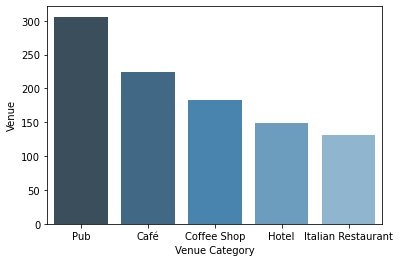

In [8]:
london_short_top = london_short.sort_values(by=['Venue'], ascending=False)[0:5]

import seaborn as sns
sns.barplot(x="Venue Category", y="Venue", data=london_short_top.reset_index(), palette="Blues_d")

This plot is a bonus to see the distributions of retaurants in London


s=sns.barplot(x="Venue Category", y="Venue", data=restaurant_short.sort_values(by=['Venue'], ascending=False)[0:100].reset_index(), palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(), rotation=30)

In [9]:
london_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Chelsea              51.487542                -0.16822   
1      Chelsea              51.487542                -0.16822   
2      Chelsea              51.487542                -0.16822   
3      Chelsea              51.487542                -0.16822   
4      Chelsea              51.487542                -0.16822   

                    Venue  Venue Latitude  Venue Longitude  \
0           Anthropologie       51.488012        -0.166653   
1    Phật Phúc Noodle Bar       51.487620        -0.169044   
2  The Ivy Chelsea Garden       51.487035        -0.169379   
3        Chelsea Gardener       51.488213        -0.169380   
4             Waterstones       51.488829        -0.165512   

          Venue Category  
0          Women's Store  
1  Vietnamese Restaurant  
2     English Restaurant  
3          Garden Center  
4              Bookstore

In [10]:
london_venues_count = london_venues.groupby('Neighborhood').count().reset_index()
london_venues_count[['Neighborhood', 'Venue']]


Neighborhood  Venue
0                Balham      2
1             Belgravia    100
2            Bermondsey    100
3         Bethnal Green    100
4            Blackheath     39
5               Brixton    100
6            Camberwell     79
7             Cambridge    100
8           Camden Town    100
9          Canary Wharf    100
10              Cardiff     84
11              Chelsea    100
12            Chingford     18
13             Chiswick    100
14         Clapham Town     80
15          Clerkenwell    100
16        Covent Garden    100
17           Crouch End     68
18              Dulwich     13
19               Ealing    100
20         Earl's Court    100
21            Edinburgh    100
22  Elephant and Castle    100
23        Finsbury Park     58
24          Hammersmith    100
25            Hampstead     88
26             Highgate     44
27           Kennington    100
28          Kings Cross    100
29        Knightsbridge    100
30             Lewisham     34
31           Maida Vale     93
32           Manchester    100
33           Marylebone    100
34              Mayfair    100
35         Muswell Hill     71
36         Notting Hill    100
37              Peckham     97
38              Pimlico    100
39        Primrose Hill    100
40               Putney    100
41      Shepherd's Bush     71
42           Shoreditch    100
43                 Soho    100
44           South Bank    100
45     South Kensington    100
46      Stoke Newington    100
47            Streatham     68
48            The Angel    100
49              Tooting     81
50          Westminster    100
51            Wimbledon    100
52             Woolwich     21

In [11]:
london_venues.shape

(4509, 7)

In [12]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 325 uniques categories.


# Analyze Each Neighborhood

In [13]:
london_one_hot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="") 

# add neighborhood column back to dataframe
london_one_hot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_one_hot.columns[-1]] + list(london_one_hot.columns[:-1])
london_one_hot = london_one_hot[fixed_columns]

london_one_hot.head()

Zoo Exhibit  Afghan Restaurant  African Restaurant  American Restaurant  \
0            0                  0                   0                    0   
1            0                  0                   0                    0   
2            0                  0                   0                    0   
3            0                  0                   0                    0   
4            0                  0                   0                    0   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0                 0                       0            0   
1             0                 0                       0            0   
2             0                 0                       0            0   
3             0                 0                       0            0   
4             0                 0                       0            0   

   Art Museum  Arts & Crafts Store  ...  Whisky Bar  Windmill  Wine Bar  \
0           0                    0  ...           0         0         0   
1           0                    0  ...           0         0         0   
2           0                    0  ...           0         0         0   
3           0                    0  ...           0         0         0   
4           0                    0  ...           0         0         0   

   Wine Shop  Winery  Wings Joint  Women's Store  Xinjiang Restaurant  \
0          0       0            0              1                    0   
1          0       0            0              0                    0   
2          0       0            0              0                    0   
3          0       0            0              0                    0   
4          0       0            0              0                    0   

   Yoga Studio  Zoo  
0            0    0  
1            0    0  
2            0    0  
3            0    0  
4            0    0  

[5 rows x 325 columns]

In [14]:
london_one_hot.shape

(4509, 325)

In [15]:
# Group rows by neighborhood and take the mean as frequency of occurrence of each cateogry.
london_grouped = london_one_hot.groupby('Neighborhood').mean().reset_index()
london_grouped

Neighborhood  Zoo Exhibit  Afghan Restaurant  African Restaurant  \
0                Balham         0.00               0.00            0.000000   
1             Belgravia         0.00               0.00            0.000000   
2            Bermondsey         0.00               0.00            0.000000   
3         Bethnal Green         0.00               0.00            0.000000   
4            Blackheath         0.00               0.00            0.000000   
5               Brixton         0.00               0.00            0.020000   
6            Camberwell         0.00               0.00            0.000000   
7             Cambridge         0.00               0.00            0.000000   
8           Camden Town         0.00               0.00            0.000000   
9          Canary Wharf         0.00               0.00            0.000000   
10              Cardiff         0.00               0.00            0.000000   
11              Chelsea         0.00               0.00            0.000000   
12            Chingford         0.00               0.00            0.000000   
13             Chiswick         0.00               0.00            0.000000   
14         Clapham Town         0.00               0.00            0.000000   
15          Clerkenwell         0.00               0.00            0.000000   
16        Covent Garden         0.00               0.00            0.000000   
17           Crouch End         0.00               0.00            0.000000   
18              Dulwich         0.00               0.00            0.000000   
19               Ealing         0.00               0.00            0.000000   
20         Earl's Court         0.00               0.00            0.000000   
21            Edinburgh         0.00               0.00            0.000000   
22  Elephant and Castle         0.00               0.00            0.000000   
23        Finsbury Park         0.00               0.00            0.000000   
24          Hammersmith         0.00               0.00            0.000000   
25            Hampstead         0.00               0.00            0.000000   
26             Highgate         0.00               0.00            0.000000   
27           Kennington         0.00               0.00            0.000000   
28          Kings Cross         0.00               0.00            0.000000   
29        Knightsbridge         0.00               0.00            0.000000   
30             Lewisham         0.00               0.00            0.000000   
31           Maida Vale         0.00               0.00            0.010753   
32           Manchester         0.00               0.00            0.000000   
33           Marylebone         0.00               0.00            0.000000   
34              Mayfair         0.00               0.00            0.000000   
35         Muswell Hill         0.00               0.00            0.000000   
36         Notting Hill         0.00               0.00            0.000000   
37              Peckham         0.00               0.00            0.010309   
38              Pimlico         0.00               0.00            0.000000   
39        Primrose Hill         0.14               0.00            0.000000   
40               Putney         0.00               0.00            0.000000   
41      Shepherd's Bush         0.00               0.00            0.014085   
42           Shoreditch         0.00               0.00            0.000000   
43                 Soho         0.00               0.00            0.000000   
44           South Bank         0.00               0.00            0.000000   
45     South Kensington         0.00               0.00            0.000000   
46      Stoke Newington         0.00               0.00            0.000000   
47            Streatham         0.00               0.00            0.000000   
48            The Angel         0.00               0.01            0.000000   
49              Tooting         0.00               0.00      

Print top 5 most common venues from each neighborhood

In [16]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Balham----
                venue  freq
0  Miscellaneous Shop   0.5
1          Watch Shop   0.5
2         Zoo Exhibit   0.0
3    Pedestrian Plaza   0.0
4            Pharmacy   0.0


----Belgravia----
                venue  freq
0               Hotel  0.12
1  Italian Restaurant  0.07
2            Boutique  0.06
3                Café  0.05
4               Plaza  0.04


----Bermondsey----
           venue  freq
0            Pub  0.10
1        Brewery  0.07
2  Grocery Store  0.06
3    Coffee Shop  0.05
4           Park  0.05


----Bethnal Green----
          venue  freq
0   Coffee Shop  0.14
1           Pub  0.11
2          Café  0.08
3  Cocktail Bar  0.04
4    Restaurant  0.04


----Blackheath----
               venue  freq
0                Pub  0.10
1             Bakery  0.08
2               Café  0.08
3  Indian Restaurant  0.05
4        Pizza Place  0.05


----Brixton----
                  venue  freq
0           Coffee Shop  0.08
1                   Pub  0.07
2           Pizza Place

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Print top 10 venues from each neighborhood

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0                Balham            Watch Shop         Miscellaneous Shop   
1             Belgravia                 Hotel         Italian Restaurant   
2            Bermondsey                   Pub                    Brewery   
3         Bethnal Green           Coffee Shop                        Pub   
4            Blackheath                   Pub                       Café   
5               Brixton           Coffee Shop                        Pub   
6            Camberwell                  Café              Grocery Store   
7             Cambridge                   Pub                       Café   
8           Camden Town                   Pub                Coffee Shop   
9          Canary Wharf           Coffee Shop         Italian Restaurant   
10              Cardiff           Coffee Shop                        Pub   
11              Chelsea    Italian Restaurant                     Bakery   
12            Chingford                   Pub         Italian Restaurant   
13             Chiswick                   Pub                       Café   
14         Clapham Town                   Pub                Coffee Shop   
15          Clerkenwell           Coffee Shop       Gym / Fitness Center   
16        Covent Garden           Coffee Shop                      Hotel   
17           Crouch End                   Pub                       Café   
18              Dulwich                Bakery                        Pub   
19               Ealing                   Pub                Coffee Shop   
20         Earl's Court                 Hotel                       Café   
21            Edinburgh                 Hotel                       Café   
22  Elephant and Castle                   Pub                       Café   
23        Finsbury Park                  Café                        Pub   
24          Hammersmith                   Pub                Coffee Shop   
25            Hampstead                  Café                        Pub   
26             Highgate                   Pub                       Café   
27           Kennington                   Pub                       Café   
28          Kings Cross           Coffee Shop                      Hotel   
29        Knightsbridge                  Café                      Hotel   
30             Lewisham                   Pub                Coffee Shop   
31           Maida Vale                   Pub                       Café   
32           Manchester           Coffee Shop                      Hotel   
33           Marylebone           Coffee Shop          French Restaurant   
34              Mayfair                 Hotel             Clothing Store   
35         Muswell Hill                  Café                        Pub   
36         Notting Hill    Italian Restaurant                        Pub   
37              Peckham                   Pub                   Bus Stop   
38              Pimlico           Coffee Shop                      Hotel   
39        Primrose Hill           Zoo Exhibit                       Café   
40               Putney                   Pub                Coffee Shop   
41      Shepherd's Bush        Clothing Store  Middle Eastern Restaurant   
42           Shoreditch           Coffee Shop                        Pub   
43                 Soho                 Hotel             Ice Cream Shop   
44           South Bank                 Hotel                    Theater   
45     South Kensington                  Café                    Exhibit   
46      Stoke Newington                   Pub                       Café   
47            Streatham                   Pub                       Café   
48            The Angel                   Pub                Coffee Shop   
49              Tooting                   Pub          Indian Restaurant   
50          Westminster                 Hotel                Coffee Shop   
51            Wimbledon                   Pub              

# Cluster neighborhoods

### cluster the neighborhood into 5 clusters using K-means and plot them into London maps

In [19]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 
#london_grouped_clustering

array([1, 0, 2, 2, 2, 4, 2, 2, 2, 4, 0, 4, 3, 2, 2, 4, 4, 2, 2, 2, 0, 0,
       3, 2, 2, 2, 3, 2, 4, 0, 2, 2, 0, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4,
       0, 4, 2, 2, 2, 2, 0, 2, 2])

In [20]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_neighborhood

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged.head() # check the last columns!
london_merged = london_merged.dropna()

In [27]:
# create map
map_clusters = folium.Map(location=[latitude_london, longitude_london], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Let's list all the neightborhood from each cluster

In [28]:
print("Cluster 1")
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

Cluster 1


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
5     Westminster                 Hotel           Coffee Shop   
7   Knightsbridge                  Café                 Hotel   
27      Belgravia                 Hotel    Italian Restaurant   
43   Earl's Court                 Hotel                  Café   
45     South Bank                 Hotel               Theater   
51     Manchester           Coffee Shop                 Hotel   
53      Edinburgh                 Hotel                  Café   
54        Cardiff           Coffee Shop                   Pub   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5                  Plaza                  Café     Outdoor Sculpture   
7     Italian Restaurant              Boutique               Exhibit   
27              Boutique                  Café                 Plaza   
43                   Pub           Pizza Place    Italian Restaurant   
45                   Pub           Coffee Shop        Scenic Lookout   
51                   Bar                  Café    Italian Restaurant   
53                   Bar           Coffee Shop                   Pub   
54                 Hotel            Restaurant                   Bar   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5                 Garden                  Park   Monument / Landmark   
7    Japanese Restaurant                Garden           Coffee Shop   
27   Japanese Restaurant            Restaurant             Gastropub   
43       Thai Restaurant          Burger Joint           Coffee Shop   
45             Bookstore                   Bar            Art Museum   
51                   Pub     Indian Restaurant              Tea Room   
53                Museum            Restaurant            Whisky Bar   
54          Burger Joint                  Café         Deli / Bodega   

    9th Most Common Venue 10th Most Common Venue  
5          Sandwich Place          Historic Site  
7             Art Gallery       Department Store  
27           Burger Joint                Theater  
43                 Garden      Indian Restaurant  
45           Burger Joint          Grocery Store  
51                  Plaza           Burger Joint  
53           Cocktail Bar               Beer Bar  
54  Portuguese Restaurant                   Park

In [29]:
print("Cluster 2")
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

Cluster 2


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
40       Balham            Watch Shop    Miscellaneous Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
40                   Zoo   Filipino Restaurant           Film Studio   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
40     Fish & Chips Shop           Fish Market           Flea Market   

   9th Most Common Venue 10th Most Common Venue  
40           Flower Shop                   Food

In [30]:
print("Cluster 3")
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

Cluster 3


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1       Camden Town                   Pub           Coffee Shop   
11    Primrose Hill           Zoo Exhibit                  Café   
13        The Angel                   Pub           Coffee Shop   
14          Peckham                   Pub              Bus Stop   
16    Finsbury Park                  Café                   Pub   
17        Wimbledon                   Pub                   Bar   
18      Hammersmith                   Pub           Coffee Shop   
21           Ealing                   Pub           Coffee Shop   
22        Hampstead                  Café                   Pub   
23         Chiswick                   Pub                  Café   
25        Streatham                   Pub                  Café   
28         Lewisham                   Pub           Coffee Shop   
30         Woolwich           Coffee Shop                   Pub   
31     Muswell Hill                  Café                   Pub   
32  Stoke Newington                   Pub                  Café   
33     Clapham Town                   Pub           Coffee Shop   
34    Bethnal Green           Coffee Shop                   Pub   
35       Bermondsey                   Pub               Brewery   
36           Putney                   Pub           Coffee Shop   
37          Tooting                   Pub     Indian Restaurant   
38       Camberwell                  Café         Grocery Store   
39       Maida Vale                   Pub                  Café   
41       Blackheath                   Pub                  Café   
42          Dulwich                Bakery                   Pub   
47       Kennington                   Pub                  Café   
48       Crouch End                   Pub                  Café   
52        Cambridge                   Pub                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                   Café           Pizza Place          Burger Joint   
11                   Pub     French Restaurant                   Bar   
13     French Restaurant                Bakery                  Café   
14    Italian Restaurant                  Park           Coffee Shop   
16    Italian Restaurant         Grocery Store                  Park   
17           Coffee Shop      Sushi Restaurant                  Café   
18  Gym / Fitness Center        Sandwich Place                  Café   
21    Italian Restaurant                  Park          Burger Joint   
22                Bakery    Italian Restaurant           Coffee Shop   
23           Coffee Shop                Bakery                  Park   
25         Grocery Store           Coffee Shop           Pizza Place   
28        Clothing Store            Food Truck                Bakery   
30                Bakery                 Plaza           Pizza Place   
31           Coffee Shop           Pizza Place         Grocery Store   
32    Turkish Restaurant          Cocktail Bar           Coffee Shop   
33                   Bar              Bus Stop    Italian Restaurant   
34                  Café            Restaurant          Cocktail Bar   
35         Grocery Store           Coffee Shop                  Park   
36                  Café   Japanese Restaurant    Italian Restaurant   
37           Coffee Shop         Grocery Store           Supermarket   
38           Coffee Shop                   Pub                  Park   
39         Grocery Store           Coffee Shop           Pizza Place   
41                Bakery     Indian Restaurant           Pizza Place   
42                  Park    Italian Restaurant     Food & Drink Shop   
47           Coffee Shop           Pizza Place                  Park   
48                Bakery         Grocery Store           Coffee Shop   
52           Coffee Shop          Burger Joint                  Park   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1          Italian Restaurant       

In [31]:
print("Cluster 4")
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

Cluster 4


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
24  Elephant and Castle                   Pub                  Café   
44            Chingford                   Pub    Italian Restaurant   
49             Highgate                   Pub                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
24           Coffee Shop                  Park             Gastropub   
44           Coffee Shop                  Café                  Park   
49    Italian Restaurant              Bus Stop                  Park   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
24                 Hotel        Sandwich Place  Gym / Fitness Center   
44           Golf Course         Grocery Store        History Museum   
49     Indian Restaurant           Coffee Shop             Bookstore   

   9th Most Common Venue 10th Most Common Venue  
24                Garden     Italian Restaurant  
44    Athletics & Sports      Indian Restaurant  
49                  Pool          Metro Station

In [32]:
print("Cluster 5")
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

Cluster 5


Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0            Chelsea    Italian Restaurant                     Bakery   
2               Soho                 Hotel             Ice Cream Shop   
3      Covent Garden           Coffee Shop                      Hotel   
4       Canary Wharf           Coffee Shop         Italian Restaurant   
6         Shoreditch           Coffee Shop                        Pub   
9            Mayfair                 Hotel             Clothing Store   
10      Notting Hill    Italian Restaurant                        Pub   
12           Brixton           Coffee Shop                        Pub   
19       Kings Cross           Coffee Shop                      Hotel   
20       Clerkenwell           Coffee Shop       Gym / Fitness Center   
26        Marylebone           Coffee Shop          French Restaurant   
29   Shepherd's Bush        Clothing Store  Middle Eastern Restaurant   
46           Pimlico           Coffee Shop                      Hotel   
50  South Kensington                  Café                    Exhibit   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Hotel             Bookstore             Juice Bar   
2             Steakhouse           Coffee Shop            Comic Shop   
3                Theater                Bakery        Ice Cream Shop   
4   Gym / Fitness Center                 Plaza                 Hotel   
6             Restaurant    Italian Restaurant  Gym / Fitness Center   
9      Indian Restaurant              Boutique                Lounge   
10                Bakery  Gym / Fitness Center          Cocktail Bar   
12           Pizza Place  Caribbean Restaurant          Cocktail Bar   
19                  Café    Italian Restaurant        Breakfast Spot   
20            Food Truck                   Bar    Italian Restaurant   
26                Garden             Juice Bar         Movie Theater   
29           Coffee Shop                Bakery    Italian Restaurant   
46    Italian Restaurant                  Café                Bakery   
50    Italian Restaurant                 Hotel        Science Museum   

        6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
0           French Restaurant             Restaurant        Ice Cream Shop   
2                      Bakery           Cocktail Bar              Beer Bar   
3                  Steakhouse                    Gym          Cocktail Bar   
4              Sandwich Place                   Park                Bakery   
6                        Café  Vietnamese Restaurant           Pizza Place   
9           French Restaurant       Department Store    Italian Restaurant   
10                  Bookstore             Restaurant                 Hotel   
12                     Market       Tapas Restaurant           Music Venue   
19               Burger Joint            Pizza Place           Escape Room   
20                       Park               Wine Bar                   Pub   
26  Middle Eastern Restaurant           Burger Joint                   Pub   
29                       Café              Gastropub      Department Store   
46             Sandwich Place                Theater                   Pub   
50                     Garden              Gift Shop        Ice Cream Shop   

   9th Most Common Venue 10th Most Common Venue  
0                  Plaza                   Café  
2           Gourmet Shop     Seafood Restaurant  
3       Sushi Restaurant           Burger Joint  
4            Pizza Place     English Restaurant  
6                  Hotel           Cocktail Bar  
9              Juice Bar              Hotel Bar  
10           Pizza Place          Movie Theater  
12    Italian Restaurant              BBQ Joint  
19                 Plaza                    Bar  
20   Japanese Restaurant  Street Food Gathering  
26                 Hotel             Restaurant  
29          Burger Joint         Cosmetics Shop  
46        